In [2]:
#importing relevant libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

In [5]:
df = pd.read_csv('/german data.csv') #reading csv file

In [6]:
df.head()

,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4.1,A121,67,A143,A152,2,A173,1,A192,A201,1.1
0,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201,2
1,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,A201,1
2,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A191,A201,1
3,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A191,A201,2
4,A14,36,A32,A46,9055,A65,A73,2,A93,A101,4,A124,35,A143,A153,1,A172,2,A192,A201,1


In [7]:
#assigning column names
df.columns = ["checkAccount","duration", "creditHistory", "purpose", "creditAmount","savings",
             "employedSince","installmentRate", "statusSex","otherDebtors","residenceSince",
             "property","age","otherInstallment","housing","existingCredits","job","liable",
              "telephone","foreign","class"]

In [8]:
df.columns

Index(['checkAccount', 'duration', 'creditHistory', 'purpose', 'creditAmount',
       'savings', 'employedSince', 'installmentRate', 'statusSex',
       'otherDebtors', 'residenceSince', 'property', 'age', 'otherInstallment',
       'housing', 'existingCredits', 'job', 'liable', 'telephone', 'foreign',
       'class'],
      dtype='object')

In [9]:
#mapping the data

df["checkAccount"] = df["checkAccount"].map({'A14':"0",'A11':"<0 DM", 'A12': "0 <= <200 DM",
                                                   'A13':">= 200 DM "})

df["creditHistory"] = df["creditHistory"].map({"A34":"critical account","A33":"delay in paying off",
                                                     "A32":"existing credits paid",
                                                     "A31":"all credits at this bank paid back duly",
                                                     "A30":"no credits taken"})

df["purpose"] = df["purpose"].map({ "A40": "car-new", "A41": "car-used", "A42": "furniture", "A43": "television",
                                       "A44": "domestic appliances", "A45": "repairs", "A46": "education", "A47": "vacation",
                                      "A48": "retraining", "A49": "business", "A410": "others"})

df["savings"] = df["savings"].map({"A65" : "no savings account","A61" :"<100 DM","A62" : "100 <= <500 DM",
                                                     "A63" :"500 <= < 1000 DM", "A64" :">= 1000 DM"})


df["employedSince"] = df["employedSince"].map({'A75':">=7 years", 'A74':"4<= <7 years",  'A73':"1<= < 4 years", 
                                               'A72':"<1 years",'A71':"unemployed"})

df['statusSex'] = df['statusSex'].map({"A93": "male", "A92": "female", "A91": "male", "A94": "male", "A95": "female"})

df['otherDebtors'] = df['otherDebtors'].map({'A101':"none", 'A102':"co-applicant", 'A103':"guarantor"})


df['property'] = df['property'].map({'A121':"real estate", 'A122':"savings agreement/life insurance", 
                                         'A123':"car or other", 'A124':"unknown / no property"})

df['otherInstallment'] = df['otherInstallment'].map({'A143':"none", 'A142':"store", 'A141':"bank"})


df["housing"] = df["housing"].map({"A151" : "rent", "A152" : "own", "A153" : "for free"})


df["job"] = df["job"].map({'A174':"management/ highly qualified employee", 'A173':"skilled employee / official", 
                               'A172':"unskilled - resident", 'A171':"unemployed/ unskilled  - non-resident"})

df["telephone"] = df["telephone"].map({'A192':"yes", 'A191':"none"})



df["foreign"] = df["foreign"].map({'A201':"yes", 'A202':"no"})

In [10]:
df.head()

,checkAccount,duration,creditHistory,purpose,creditAmount,savings,employedSince,installmentRate,statusSex,otherDebtors,residenceSince,property,age,otherInstallment,housing,existingCredits,job,liable,telephone,foreign,class
0,0 <= <200 DM,48,existing credits paid,television,5951,<100 DM,1<= < 4 years,2,female,none,2,real estate,22,none,own,1,skilled employee / official,1,none,yes,2
1,0,12,critical account,education,2096,<100 DM,4<= <7 years,2,male,none,3,real estate,49,none,own,1,unskilled - resident,2,none,yes,1
2,<0 DM,42,existing credits paid,furniture,7882,<100 DM,4<= <7 years,2,male,guarantor,4,savings agreement/life insurance,45,none,for free,1,skilled employee / official,2,none,yes,1
3,<0 DM,24,delay in paying off,car-new,4870,<100 DM,1<= < 4 years,3,male,none,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes,2
4,0,36,existing credits paid,education,9055,no savings account,1<= < 4 years,2,male,none,4,unknown / no property,35,none,for free,1,unskilled - resident,2,yes,yes,1


In [11]:
df.dtypes

checkAccount        object
duration             int64
creditHistory       object
purpose             object
creditAmount         int64
savings             object
employedSince       object
installmentRate      int64
statusSex           object
otherDebtors        object
residenceSince       int64
property            object
age                  int64
otherInstallment    object
housing             object
existingCredits      int64
job                 object
liable               int64
telephone           object
foreign             object
class                int64
dtype: object

In [12]:
df.dtypes.value_counts()

object    13
int64      8
dtype: int64

In [13]:
df.shape

(999, 21)

In [14]:
df.describe()

,duration,creditAmount,installmentRate,residenceSince,age,existingCredits,liable,class
count,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000
mean,20.917918,3273.362362,2.971972,2.843844,35.514515,1.406406,1.155155,1.300300
std,12.055619,2823.365811,1.118802,1.103665,11.337487,0.577639,0.362234,0.458618
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000
25%,12.000000,1368.500000,2.000000,2.000000,27.000000,1.000000,1.000000,1.000000
50%,18.000000,2320.000000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000
75%,24.000000,3972.500000,4.000000,4.000000,42.000000,2.000000,1.000000,2.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,2.000000


In [15]:
min_threshold, max_threshold=df.creditAmount.quantile([0.005,0.995])
min_threshold, max_threshold

(361.81, 14903.569999999992)

In [16]:
df[df.creditAmount>max_threshold]

,checkAccount,duration,creditHistory,purpose,creditAmount,savings,employedSince,installmentRate,statusSex,otherDebtors,residenceSince,property,age,otherInstallment,housing,existingCredits,job,liable,telephone,foreign,class
94,0 <= <200 DM,54,no credits taken,business,15945,<100 DM,<1 years,3,male,none,4,unknown / no property,58,none,rent,1,skilled employee / official,1,yes,yes,2
636,0,60,delay in paying off,television,15653,<100 DM,4<= <7 years,2,male,none,4,car or other,21,none,own,2,skilled employee / official,1,yes,yes,1
817,<0 DM,36,existing credits paid,others,15857,<100 DM,unemployed,2,male,co-applicant,3,car or other,43,none,own,1,management/ highly qualified employee,1,none,yes,1
886,0 <= <200 DM,48,existing credits paid,business,15672,<100 DM,1<= < 4 years,2,male,none,2,car or other,23,none,own,1,skilled employee / official,1,yes,yes,2
914,0 <= <200 DM,48,no credits taken,others,18424,<100 DM,1<= < 4 years,1,female,none,2,savings agreement/life insurance,32,bank,own,1,management/ highly qualified employee,1,yes,no,2


In [17]:
df[df.creditAmount<min_threshold]

,checkAccount,duration,creditHistory,purpose,creditAmount,savings,employedSince,installmentRate,statusSex,otherDebtors,residenceSince,property,age,otherInstallment,housing,existingCredits,job,liable,telephone,foreign,class
156,<0 DM,12,all credits at this bank paid back duly,retraining,339,<100 DM,>=7 years,4,male,none,1,car or other,45,bank,own,1,unskilled - resident,1,none,yes,1
176,<0 DM,6,critical account,television,338,500 <= < 1000 DM,>=7 years,4,male,none,4,car or other,52,none,own,2,skilled employee / official,1,none,yes,1
308,0 <= <200 DM,9,existing credits paid,car-new,276,<100 DM,1<= < 4 years,4,male,none,4,real estate,22,none,rent,1,unskilled - resident,1,none,yes,1
457,<0 DM,6,existing credits paid,domestic appliances,343,<100 DM,<1 years,4,female,none,1,real estate,27,none,own,1,skilled employee / official,1,none,yes,1
724,0,6,critical account,car-new,250,>= 1000 DM,1<= < 4 years,2,female,none,2,real estate,41,bank,own,2,unskilled - resident,1,none,yes,1


In [18]:
min_threshold, max_threshold=df.age.quantile([0.005,0.995])
min_threshold, max_threshold

(20.0, 74.0)

In [19]:
df[df.age>max_threshold]

,checkAccount,duration,creditHistory,purpose,creditAmount,savings,employedSince,installmentRate,statusSex,otherDebtors,residenceSince,property,age,otherInstallment,housing,existingCredits,job,liable,telephone,foreign,class
329,<0 DM,24,critical account,car-used,6615,<100 DM,unemployed,2,male,none,4,unknown / no property,75,none,for free,2,management/ highly qualified employee,1,yes,yes,1
535,<0 DM,6,existing credits paid,car-new,1374,no savings account,unemployed,4,female,none,3,savings agreement/life insurance,75,none,own,1,management/ highly qualified employee,1,yes,yes,1


In [20]:
min_threshold, max_threshold=df.creditAmount.quantile([0.005,0.995])
min_threshold, max_threshold

(361.81, 14903.569999999992)

In [21]:
df[df.creditAmount>max_threshold]

,checkAccount,duration,creditHistory,purpose,creditAmount,savings,employedSince,installmentRate,statusSex,otherDebtors,residenceSince,property,age,otherInstallment,housing,existingCredits,job,liable,telephone,foreign,class
94,0 <= <200 DM,54,no credits taken,business,15945,<100 DM,<1 years,3,male,none,4,unknown / no property,58,none,rent,1,skilled employee / official,1,yes,yes,2
636,0,60,delay in paying off,television,15653,<100 DM,4<= <7 years,2,male,none,4,car or other,21,none,own,2,skilled employee / official,1,yes,yes,1
817,<0 DM,36,existing credits paid,others,15857,<100 DM,unemployed,2,male,co-applicant,3,car or other,43,none,own,1,management/ highly qualified employee,1,none,yes,1
886,0 <= <200 DM,48,existing credits paid,business,15672,<100 DM,1<= < 4 years,2,male,none,2,car or other,23,none,own,1,skilled employee / official,1,yes,yes,2
914,0 <= <200 DM,48,no credits taken,others,18424,<100 DM,1<= < 4 years,1,female,none,2,savings agreement/life insurance,32,bank,own,1,management/ highly qualified employee,1,yes,no,2


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


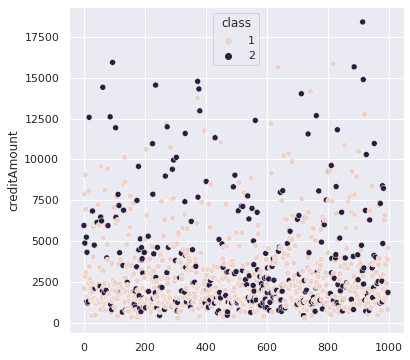

In [22]:
sns.set(rc={'figure.figsize' : (6,6)})
sns.scatterplot(df.index, y=df.creditAmount, hue = df["class"])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


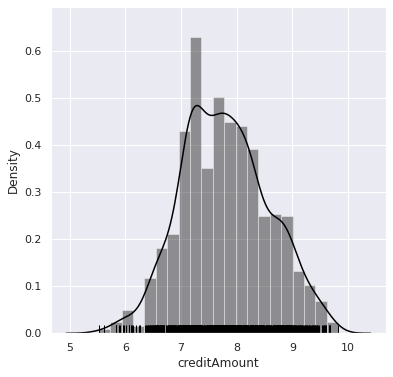

In [23]:
sns.set(rc={'figure.figsize' : (6,6)})
sns.distplot(np.log(df.creditAmount), color = 'black', rug=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


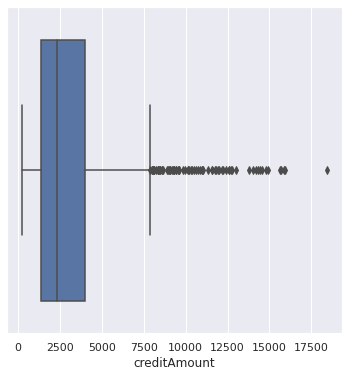

In [24]:
sns.boxplot(df.creditAmount)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


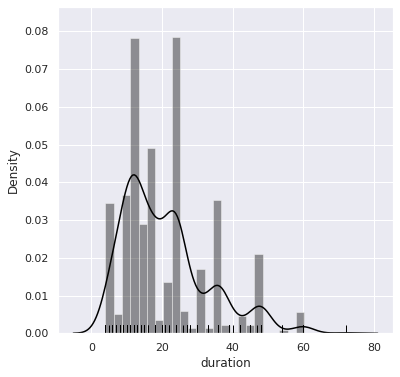

In [25]:
sns.set(rc={'figure.figsize' : (6,6)})
sns.distplot(df.duration, color = 'black', rug=True)

In [26]:
min_threshold, max_threshold=df.duration.quantile([0.005,0.995])
min_threshold, max_threshold

(4.0, 60.0)

In [27]:
df[df.duration<min_threshold]

,checkAccount,duration,creditHistory,purpose,creditAmount,savings,employedSince,installmentRate,statusSex,otherDebtors,residenceSince,property,age,otherInstallment,housing,existingCredits,job,liable,telephone,foreign,class


In [28]:
df[df.duration>max_threshold]

,checkAccount,duration,creditHistory,purpose,creditAmount,savings,employedSince,installmentRate,statusSex,otherDebtors,residenceSince,property,age,otherInstallment,housing,existingCredits,job,liable,telephone,foreign,class
676,0 <= <200 DM,72,existing credits paid,television,5595,100 <= <500 DM,1<= < 4 years,2,male,none,2,car or other,24,none,own,1,skilled employee / official,1,none,yes,2


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


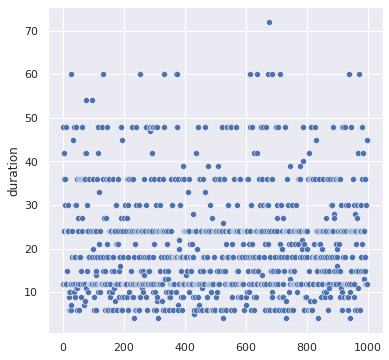

In [29]:
sns.set(rc={'figure.figsize' : (6,6)})
sns.scatterplot(df.index, y=df.duration)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


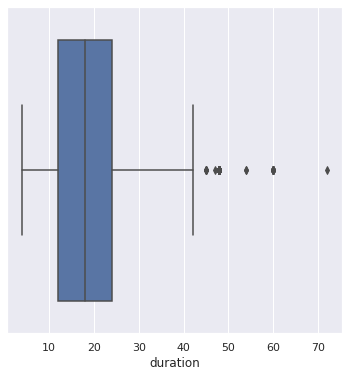

In [30]:
sns.boxplot(df.duration)

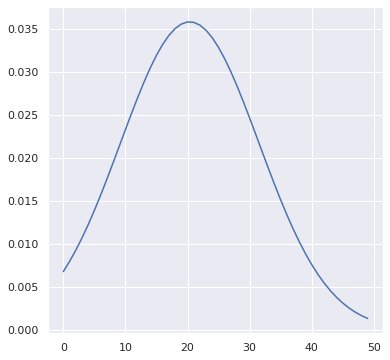

In [31]:
from scipy.stats import norm
rng = np.arange(df.duration[df.duration<60].max() - df.duration[df.duration<60].min())
plt.plot(rng, norm.pdf(rng, df.duration[df.duration<60].mean(), df.duration[df.duration<60].std()))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


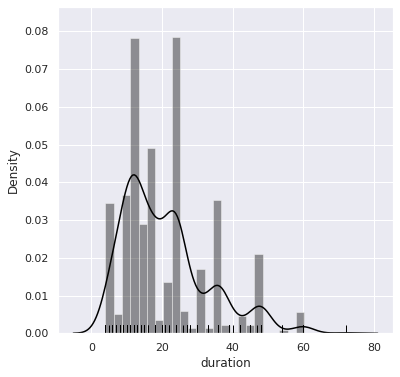

In [32]:
sns.set(rc={'figure.figsize' : (6,6)})
sns.distplot((df.duration), color = 'black', rug=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


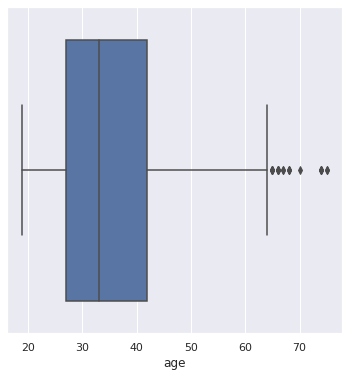

In [33]:
sns.boxplot(df.age)

In [34]:
df.installmentRate.value_counts().head()

4    475
2    231
3    157
1    136
Name: installmentRate, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


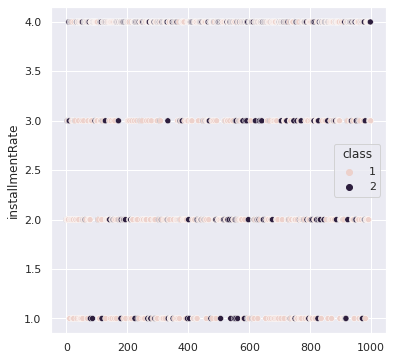

In [35]:
sns.set(rc={'figure.figsize' : (6,6)})
sns.scatterplot(df.index, y=df.installmentRate, hue = df["class"])

In [36]:
#numerical variables labels
numvars = ['duration', 'creditAmount', 'installmentRate','residenceSince', 'age', 
           'existingCredits', 'liable']

In [37]:
df.liable.value_counts().head()

1    844
2    155
Name: liable, dtype: int64

In [38]:
# removing outliers from duration

df_new = df[df.duration<70]
df_new.shape

(998, 21)

In [39]:
 pd.options.mode.chained_assignment = None
df_new["creditAmount"] = np.log(df_new.creditAmount)
df_new["age"] = np.log(df_new.age)
df_new.head()

,checkAccount,duration,creditHistory,purpose,creditAmount,savings,employedSince,installmentRate,statusSex,otherDebtors,residenceSince,property,age,otherInstallment,housing,existingCredits,job,liable,telephone,foreign,class
0,0 <= <200 DM,48,existing credits paid,television,8.691315,<100 DM,1<= < 4 years,2,female,none,2,real estate,3.091042,none,own,1,skilled employee / official,1,none,yes,2
1,0,12,critical account,education,7.647786,<100 DM,4<= <7 years,2,male,none,3,real estate,3.891820,none,own,1,unskilled - resident,2,none,yes,1
2,<0 DM,42,existing credits paid,furniture,8.972337,<100 DM,4<= <7 years,2,male,guarantor,4,savings agreement/life insurance,3.806662,none,for free,1,skilled employee / official,2,none,yes,1
3,<0 DM,24,delay in paying off,car-new,8.490849,<100 DM,1<= < 4 years,3,male,none,4,unknown / no property,3.970292,none,for free,2,skilled employee / official,2,none,yes,2
4,0,36,existing credits paid,education,9.111072,no savings account,1<= < 4 years,2,male,none,4,unknown / no property,3.555348,none,for free,1,unskilled - resident,2,yes,yes,1


In [40]:
# extracting X and y

y=df_new['class']
X=df_new.drop(['class'], axis=1)

In [41]:
from sklearn.preprocessing import MinMaxScaler

X_stand = X.copy()
# apply standardization on numerical features
for i in numvars:
    
    # fit on training data column
    scale = MinMaxScaler().fit(X[[i]])
    
    # transform the training data column
    X_stand[i] = scale.transform(X_stand[[i]])
X_stand.head()

,checkAccount,duration,creditHistory,purpose,creditAmount,savings,employedSince,installmentRate,statusSex,otherDebtors,residenceSince,property,age,otherInstallment,housing,existingCredits,job,liable,telephone,foreign
0,0 <= <200 DM,0.785714,existing credits paid,television,0.737184,<100 DM,1<= < 4 years,0.333333,female,none,0.333333,real estate,0.106772,none,own,0.000000,skilled employee / official,0.0,none,yes
1,0,0.142857,critical account,education,0.494500,<100 DM,4<= <7 years,0.333333,male,none,0.666667,real estate,0.689984,none,own,0.000000,unskilled - resident,1.0,none,yes
2,<0 DM,0.678571,existing credits paid,furniture,0.802539,<100 DM,4<= <7 years,0.333333,male,guarantor,1.000000,savings agreement/life insurance,0.627963,none,for free,0.000000,skilled employee / official,1.0,none,yes
3,<0 DM,0.357143,delay in paying off,car-new,0.690564,<100 DM,1<= < 4 years,0.666667,male,none,1.000000,unknown / no property,0.747135,none,for free,0.333333,skilled employee / official,1.0,none,yes
4,0,0.571429,existing credits paid,education,0.834803,no savings account,1<= < 4 years,0.333333,male,none,1.000000,unknown / no property,0.444929,none,for free,0.000000,unskilled - resident,1.0,yes,yes


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


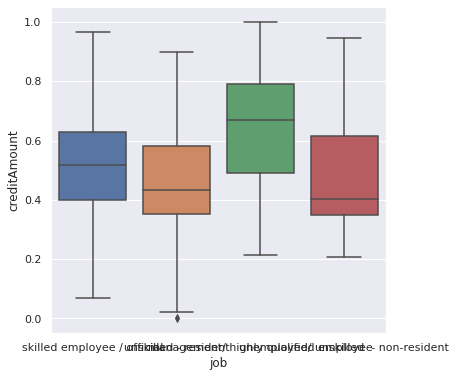

In [42]:
sns.boxplot(X_stand.job, X_stand.creditAmount)

In [43]:
#following categories are ordinal, hence different encoding method would be applied on them
ordinal = ["checkAccount", "creditHistory", "savings", "employedSince","otherDebtors","property",
        "otherInstallment","housing","job"]

#following attributes are nominal
nominal = ["statusSex","purpose","telephone", "foreign"]

In [44]:
#label encoding for ordinal data
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
d = defaultdict(LabelEncoder)
le = X_stand[ordinal].apply(lambda x: d[x.name].fit_transform(x))

In [45]:
#one-hot encoding for nominal data
dummyvars = pd.get_dummies(X_stand[nominal])

In [46]:
#concatenate transformed data
clean_data = pd.concat([X_stand[numvars], le, dummyvars], axis = 1)
clean_data.head()

,duration,creditAmount,installmentRate,residenceSince,age,existingCredits,liable,checkAccount,creditHistory,savings,employedSince,otherDebtors,property,otherInstallment,housing,job,statusSex_female,statusSex_male,purpose_business,purpose_car-new,purpose_car-used,purpose_domestic appliances,purpose_education,purpose_furniture,purpose_others,purpose_repairs,purpose_retraining,purpose_television,telephone_none,telephone_yes,foreign_no,foreign_yes
0,0.785714,0.737184,0.333333,0.333333,0.106772,0.000000,0.0,1,3,2,0,2,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1
1,0.142857,0.494500,0.333333,0.666667,0.689984,0.000000,1.0,0,1,2,1,2,1,1,1,3,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1
2,0.678571,0.802539,0.333333,1.000000,0.627963,0.000000,1.0,2,3,2,1,1,2,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1
3,0.357143,0.690564,0.666667,1.000000,0.747135,0.333333,1.0,2,2,2,0,2,3,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1
4,0.571429,0.834803,0.333333,1.000000,0.444929,0.000000,1.0,0,3,4,0,2,3,1,0,3,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1


In [47]:
# train-test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(clean_data,y,test_size=0.2, random_state=1)

In [48]:
X_train.shape

(798, 32)

In [49]:
y_train.value_counts().head()

1    558
2    240
Name: class, dtype: int64

In [50]:
# applying KNN
def  dist(x, y):
    return  np.sqrt(np.sum((x-y)**2))

In [51]:
no_errors =0
distance=np.zeros(len(X_train))

for j in range (len(X_test)):
    for i in range (len(X_train)):
        
        distance[i] = dist(X_train.iloc[i], X_test.iloc[j])
    min_index = np.argmin(distance) 
        
    if  y_train.iloc[min_index] !=  y_test.iloc[j]:
        no_errors  +=1

print('Total  error : ', no_errors)

Total  error :  66


In [53]:
import math
import operator 

def euclideanDistance(instance1, instance2, length):
    distance = 0
    for x in range(length):
        distance += pow((instance1[x] - instance2[x]), 2)
    return math.sqrt(distance)

def getNeighbors(trainingSet, testInstance, k):
    distances = []
    length = len(testInstance)-1
    for x in range(len(trainingSet)):
        dist = euclideanDistance(testInstance, trainingSet.iloc[x], length)
        distances.append((trainingSet.iloc[x], dist))
    distances.sort(key=operator.itemgetter(1))
    neighbors = []
    for x in range(k):
        neighbors.append(distances[x][0])
    return neighbors

def getResponse(neighbors):
    classVotes = {}
    for x in range(len(neighbors)):
        response = neighbors[x][-1]
        if response in classVotes:
            classVotes[response] += 1
        else:
            classVotes[response] = 1
        sortedVotes = sorted(classVotes.items(), key=operator.itemgetter(1), reverse=True)
    return sortedVotes[0][0]

def getAccuracy(testSet, predictions):
    correct = 0
    for x in range(len(testSet)):
        if testSet.iloc[x][-1] == predictions[x]:
            correct += 1
    return (correct/float(len(testSet))) * 100.0

In [54]:
X_tr = pd.concat([X_train, y_train],axis=1)
X_te = pd.concat([X_test, y_test],axis=1)

In [55]:
# Case 1

k = [1,3,5]
for i in range (len(k)):
    predictions=[]
    for x in range(len(X_te)):
        neighbors = getNeighbors(X_tr, X_te.iloc[x], k[i])
        result = getResponse(neighbors)
        predictions.append(result)
        #print('> predicted=' + repr(result) + ', actual=' + repr(X_te.iloc[x][-1]))
    accuracy = getAccuracy(X_te, predictions)
    print('accuracy of k = ', k[i], " is ", accuracy)

accuracy of k =  1  is  67.0
accuracy of k =  3  is  66.5
accuracy of k =  5  is  68.5


In [56]:
#label encoding cat variables

catvars = ["checkAccount", "creditHistory", "savings", "employedSince","otherDebtors","property",
        "otherInstallment","housing","job","statusSex","purpose","telephone", "foreign"]

from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
d = defaultdict(LabelEncoder)
le = X_stand[catvars].apply(lambda x: d[x.name].fit_transform(x))
#concatenate transformed data
clean_data2 = pd.concat([X_stand[numvars], le], axis = 1)
clean_data2.head()

,duration,creditAmount,installmentRate,residenceSince,age,existingCredits,liable,checkAccount,creditHistory,savings,employedSince,otherDebtors,property,otherInstallment,housing,job,statusSex,purpose,telephone,foreign
0,0.785714,0.737184,0.333333,0.333333,0.106772,0.000000,0.0,1,3,2,0,2,1,1,1,1,0,9,0,1
1,0.142857,0.494500,0.333333,0.666667,0.689984,0.000000,1.0,0,1,2,1,2,1,1,1,3,1,4,0,1
2,0.678571,0.802539,0.333333,1.000000,0.627963,0.000000,1.0,2,3,2,1,1,2,1,0,1,1,5,0,1
3,0.357143,0.690564,0.666667,1.000000,0.747135,0.333333,1.0,2,2,2,0,2,3,1,0,1,1,1,0,1
4,0.571429,0.834803,0.333333,1.000000,0.444929,0.000000,1.0,0,3,4,0,2,3,1,0,3,1,4,1,1


In [57]:
# train-test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(clean_data2,y,test_size=0.2, random_state=1)

In [58]:
# Case 2
X_tr = pd.concat([X_train, y_train],axis=1)
X_te = pd.concat([X_test, y_test],axis=1)

k = [1,3,5]
for i in range (len(k)):
    predictions=[]
    
    for x in range(len(X_te)):
        neighbors = getNeighbors(X_tr, X_te.iloc[x], k[i])
        result = getResponse(neighbors)
        predictions.append(result)
        #print('> predicted=' + repr(result) + ', actual=' + repr(X_te.iloc[x][-1]))
    accuracy = getAccuracy(X_te, predictions)
    print('accuracy of k = ', k[i], " is ", accuracy)

accuracy of k =  1  is  69.5
accuracy of k =  3  is  70.0
accuracy of k =  5  is  69.5


In [59]:
# one-hot encoding 
dummyvars2 = pd.get_dummies(X_stand[catvars])
#concatenate transformed data
clean_data3 = pd.concat([X_stand[numvars], dummyvars2], axis = 1)
clean_data3.head()

,duration,creditAmount,installmentRate,residenceSince,age,existingCredits,liable,checkAccount_0,checkAccount_0 <= <200 DM,checkAccount_<0 DM,checkAccount_>= 200 DM,creditHistory_all credits at this bank paid back duly,creditHistory_critical account,creditHistory_delay in paying off,creditHistory_existing credits paid,creditHistory_no credits taken,savings_100 <= <500 DM,savings_500 <= < 1000 DM,savings_<100 DM,savings_>= 1000 DM,savings_no savings account,employedSince_1<= < 4 years,employedSince_4<= <7 years,employedSince_<1 years,employedSince_>=7 years,employedSince_unemployed,otherDebtors_co-applicant,otherDebtors_guarantor,otherDebtors_none,property_car or other,property_real estate,property_savings agreement/life insurance,property_unknown / no property,otherInstallment_bank,otherInstallment_none,otherInstallment_store,housing_for free,housing_own,housing_rent,job_management/ highly qualified employee,job_skilled employee / official,job_unemployed/ unskilled - non-resident,job_unskilled - resident,statusSex_female,statusSex_male,purpose_business,purpose_car-new,purpose_car-used,purpose_domestic appliances,purpose_education,purpose_furniture,purpose_others,purpose_repairs,purpose_retraining,purpose_television,telephone_none,telephone_yes,foreign_no,foreign_yes
0,0.785714,0.737184,0.333333,0.333333,0.106772,0.000000,0.0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1
1,0.142857,0.494500,0.333333,0.666667,0.689984,0.000000,1.0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1
2,0.678571,0.802539,0.333333,1.000000,0.627963,0.000000,1.0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1
3,0.357143,0.690564,0.666667,1.000000,0.747135,0.333333,1.0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1
4,0.571429,0.834803,0.333333,1.000000,0.444929,0.000000,1.0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1


In [60]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(clean_data3,y,test_size=0.2, random_state=1)

In [61]:
# Case 3
x_tr = pd.concat([X_train, y_train],axis=1)
x_te = pd.concat([X_test, y_test],axis=1)

predictions=[]
k = [1,3,5]
for i in range (len(k)):
    predictions=[]
    
    for x in range(len(x_te)):
        neighbors = getNeighbors(x_tr, x_te.iloc[x], k[i])
        result = getResponse(neighbors)
        predictions.append(result)
        #print('> predicted=' + repr(result) + ', actual=' + repr(x_te.iloc[x][-1]))
    accuracy = getAccuracy(x_te, predictions)
    print('accuracy of k = ', k[i], " is ", accuracy)

accuracy of k =  1  is  76.0
accuracy of k =  3  is  76.5
accuracy of k =  5  is  73.0


## Extracting features and then applying KNN




In [62]:
X_stand.head()

,checkAccount,duration,creditHistory,purpose,creditAmount,savings,employedSince,installmentRate,statusSex,otherDebtors,residenceSince,property,age,otherInstallment,housing,existingCredits,job,liable,telephone,foreign
0,0 <= <200 DM,0.785714,existing credits paid,television,0.737184,<100 DM,1<= < 4 years,0.333333,female,none,0.333333,real estate,0.106772,none,own,0.000000,skilled employee / official,0.0,none,yes
1,0,0.142857,critical account,education,0.494500,<100 DM,4<= <7 years,0.333333,male,none,0.666667,real estate,0.689984,none,own,0.000000,unskilled - resident,1.0,none,yes
2,<0 DM,0.678571,existing credits paid,furniture,0.802539,<100 DM,4<= <7 years,0.333333,male,guarantor,1.000000,savings agreement/life insurance,0.627963,none,for free,0.000000,skilled employee / official,1.0,none,yes
3,<0 DM,0.357143,delay in paying off,car-new,0.690564,<100 DM,1<= < 4 years,0.666667,male,none,1.000000,unknown / no property,0.747135,none,for free,0.333333,skilled employee / official,1.0,none,yes
4,0,0.571429,existing credits paid,education,0.834803,no savings account,1<= < 4 years,0.333333,male,none,1.000000,unknown / no property,0.444929,none,for free,0.000000,unskilled - resident,1.0,yes,yes


In [63]:
X_stand.otherInstallment.value_counts().head()

none     812
bank     139
store     47
Name: otherInstallment, dtype: int64

In [64]:
# dropping columns

# case 1

X_stand.drop(['age','residenceSince','statusSex','telephone'], axis = 1)

,checkAccount,duration,creditHistory,purpose,creditAmount,savings,employedSince,installmentRate,otherDebtors,property,otherInstallment,housing,existingCredits,job,liable,foreign
0,0 <= <200 DM,0.785714,existing credits paid,television,0.737184,<100 DM,1<= < 4 years,0.333333,none,real estate,none,own,0.000000,skilled employee / official,0.0,yes
1,0,0.142857,critical account,education,0.494500,<100 DM,4<= <7 years,0.333333,none,real estate,none,own,0.000000,unskilled - resident,1.0,yes
2,<0 DM,0.678571,existing credits paid,furniture,0.802539,<100 DM,4<= <7 years,0.333333,guarantor,savings agreement/life insurance,none,for free,0.000000,skilled employee / official,1.0,yes
3,<0 DM,0.357143,delay in paying off,car-new,0.690564,<100 DM,1<= < 4 years,0.666667,none,unknown / no property,none,for free,0.333333,skilled employee / official,1.0,yes
4,0,0.571429,existing credits paid,education,0.834803,no savings account,1<= < 4 years,0.333333,none,unknown / no property,none,for free,0.000000,unskilled - resident,1.0,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,0,0.142857,existing credits paid,furniture,0.450675,<100 DM,4<= <7 years,0.666667,none,real estate,none,own,0.000000,unskilled - resident,0.0,yes
995,<0 DM,0.464286,existing credits paid,car-used,0.636329,<100 DM,1<= < 4 years,1.000000,none,savings agreement/life insurance,none,own,0.000000,management/ highly qualified employee,0.0,yes
996,0,0.142857,existing credits paid,television,0.271663,<100 DM,>=7 years,1.000000,none,car or other,none,own,0.000000,skilled employee / official,0.0,yes
997,<0 DM,0.732143,existing credits paid,television,0.464837,<100 DM,1<= < 4 years,1.000000,none,unknown / no property,none,for free,0.000000,skilled employee / official,0.0,yes


In [65]:
numvars = ['duration', 'creditAmount', 'installmentRate', 
           'existingCredits', 'liable']

catvars2 = ["checkAccount", "creditHistory", "savings", "employedSince","otherDebtors","property",
        "otherInstallment","housing","job","purpose", "foreign"]

# one-hot encoding 
dummyvars3 = pd.get_dummies(X_stand[catvars2])
#concatenate transformed data
X_new = pd.concat([X_stand[numvars], dummyvars3], axis = 1)
X_new.head()

,duration,creditAmount,installmentRate,existingCredits,liable,checkAccount_0,checkAccount_0 <= <200 DM,checkAccount_<0 DM,checkAccount_>= 200 DM,creditHistory_all credits at this bank paid back duly,creditHistory_critical account,creditHistory_delay in paying off,creditHistory_existing credits paid,creditHistory_no credits taken,savings_100 <= <500 DM,savings_500 <= < 1000 DM,savings_<100 DM,savings_>= 1000 DM,savings_no savings account,employedSince_1<= < 4 years,employedSince_4<= <7 years,employedSince_<1 years,employedSince_>=7 years,employedSince_unemployed,otherDebtors_co-applicant,otherDebtors_guarantor,otherDebtors_none,property_car or other,property_real estate,property_savings agreement/life insurance,property_unknown / no property,otherInstallment_bank,otherInstallment_none,otherInstallment_store,housing_for free,housing_own,housing_rent,job_management/ highly qualified employee,job_skilled employee / official,job_unemployed/ unskilled - non-resident,job_unskilled - resident,purpose_business,purpose_car-new,purpose_car-used,purpose_domestic appliances,purpose_education,purpose_furniture,purpose_others,purpose_repairs,purpose_retraining,purpose_television,foreign_no,foreign_yes
0,0.785714,0.737184,0.333333,0.000000,0.0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1
1,0.142857,0.494500,0.333333,0.000000,1.0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1
2,0.678571,0.802539,0.333333,0.000000,1.0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
3,0.357143,0.690564,0.666667,0.333333,1.0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1
4,0.571429,0.834803,0.333333,0.000000,1.0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1


In [66]:
X_new.shape

(998, 53)

In [67]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_new,y,test_size=0.2, random_state=1)

x_tr = pd.concat([X_train, y_train],axis=1)
x_te = pd.concat([X_test, y_test],axis=1)

k = [1,3,5]
for i in range (len(k)):
    predictions=[]
    for x in range(len(x_te)):
        neighbors = getNeighbors(x_tr, x_te.iloc[x], k[i])
        result = getResponse(neighbors)
        predictions.append(result)
        #print('> predicted=' + repr(result) + ', actual=' + repr(x_te.iloc[x][-1]))
    accuracy = getAccuracy(x_te, predictions)
    print('accuracy of k = ', k[i], " is ", accuracy)

accuracy of k =  1  is  70.0
accuracy of k =  3  is  70.0
accuracy of k =  5  is  74.5


In [68]:
predictions=[]
for x in range(len(x_te)):
        neighbors = getNeighbors(x_tr, x_te.iloc[x], 7)
        result = getResponse(neighbors)
        predictions.append(result)
        #print('> predicted=' + repr(result) + ', actual=' + repr(x_te.iloc[x][-1]))
accuracy = getAccuracy(x_te, predictions)
print('accuracy of k = 7', " is ", accuracy)

accuracy of k = 7  is  77.0


In [69]:
# case 2

X_stand.drop(['age','statusSex','telephone'], axis = 1)

,checkAccount,duration,creditHistory,purpose,creditAmount,savings,employedSince,installmentRate,otherDebtors,residenceSince,property,otherInstallment,housing,existingCredits,job,liable,foreign
0,0 <= <200 DM,0.785714,existing credits paid,television,0.737184,<100 DM,1<= < 4 years,0.333333,none,0.333333,real estate,none,own,0.000000,skilled employee / official,0.0,yes
1,0,0.142857,critical account,education,0.494500,<100 DM,4<= <7 years,0.333333,none,0.666667,real estate,none,own,0.000000,unskilled - resident,1.0,yes
2,<0 DM,0.678571,existing credits paid,furniture,0.802539,<100 DM,4<= <7 years,0.333333,guarantor,1.000000,savings agreement/life insurance,none,for free,0.000000,skilled employee / official,1.0,yes
3,<0 DM,0.357143,delay in paying off,car-new,0.690564,<100 DM,1<= < 4 years,0.666667,none,1.000000,unknown / no property,none,for free,0.333333,skilled employee / official,1.0,yes
4,0,0.571429,existing credits paid,education,0.834803,no savings account,1<= < 4 years,0.333333,none,1.000000,unknown / no property,none,for free,0.000000,unskilled - resident,1.0,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,0,0.142857,existing credits paid,furniture,0.450675,<100 DM,4<= <7 years,0.666667,none,1.000000,real estate,none,own,0.000000,unskilled - resident,0.0,yes
995,<0 DM,0.464286,existing credits paid,car-used,0.636329,<100 DM,1<= < 4 years,1.000000,none,1.000000,savings agreement/life insurance,none,own,0.000000,management/ highly qualified employee,0.0,yes
996,0,0.142857,existing credits paid,television,0.271663,<100 DM,>=7 years,1.000000,none,1.000000,car or other,none,own,0.000000,skilled employee / official,0.0,yes
997,<0 DM,0.732143,existing credits paid,television,0.464837,<100 DM,1<= < 4 years,1.000000,none,1.000000,unknown / no property,none,for free,0.000000,skilled employee / official,0.0,yes


In [70]:
numvars = ['duration', 'creditAmount', 'installmentRate', 
           'existingCredits', 'liable','residenceSince']

catvars2 = ["checkAccount", "creditHistory", "savings", "employedSince","otherDebtors","property",
        "otherInstallment","housing","job","purpose", "foreign"]

# one-hot encoding 
dummyvars3 = pd.get_dummies(X_stand[catvars2])
#concatenate transformed data
X_new = pd.concat([X_stand[numvars], dummyvars3], axis = 1)
X_new.head()

,duration,creditAmount,installmentRate,existingCredits,liable,residenceSince,checkAccount_0,checkAccount_0 <= <200 DM,checkAccount_<0 DM,checkAccount_>= 200 DM,creditHistory_all credits at this bank paid back duly,creditHistory_critical account,creditHistory_delay in paying off,creditHistory_existing credits paid,creditHistory_no credits taken,savings_100 <= <500 DM,savings_500 <= < 1000 DM,savings_<100 DM,savings_>= 1000 DM,savings_no savings account,employedSince_1<= < 4 years,employedSince_4<= <7 years,employedSince_<1 years,employedSince_>=7 years,employedSince_unemployed,otherDebtors_co-applicant,otherDebtors_guarantor,otherDebtors_none,property_car or other,property_real estate,property_savings agreement/life insurance,property_unknown / no property,otherInstallment_bank,otherInstallment_none,otherInstallment_store,housing_for free,housing_own,housing_rent,job_management/ highly qualified employee,job_skilled employee / official,job_unemployed/ unskilled - non-resident,job_unskilled - resident,purpose_business,purpose_car-new,purpose_car-used,purpose_domestic appliances,purpose_education,purpose_furniture,purpose_others,purpose_repairs,purpose_retraining,purpose_television,foreign_no,foreign_yes
0,0.785714,0.737184,0.333333,0.000000,0.0,0.333333,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1
1,0.142857,0.494500,0.333333,0.000000,1.0,0.666667,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1
2,0.678571,0.802539,0.333333,0.000000,1.0,1.000000,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
3,0.357143,0.690564,0.666667,0.333333,1.0,1.000000,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1
4,0.571429,0.834803,0.333333,0.000000,1.0,1.000000,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1


In [75]:
X_new.shape

(998, 54)

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X_new,y,test_size=0.2, random_state=1)

In [80]:
x_tr = pd.concat([X_train, y_train],axis=1)
x_te = pd.concat([X_test, y_test],axis=1)

k = [1,3,5,7]
for i in range (len(k)):
    predictions=[]
    for x in range(len(x_te)):
        neighbors = getNeighbors(x_tr, x_te.iloc[x], k[i])
        result = getResponse(neighbors)
        predictions.append(result)
        #print('> predicted=' + repr(result) + ', actual=' + repr(x_te.iloc[x][-1]))
    accuracy = getAccuracy(x_te, predictions)
    print('accuracy at k = ', k[i], " is ", accuracy)

accuracy at k =  1  is  71.5
accuracy at k =  3  is  71.0
accuracy at k =  5  is  73.0
accuracy at k =  7  is  77.5
